# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

### 读取数据

In [5]:
original_data = pd.read_csv('titanic_train.csv')
original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据清洗

In [6]:
cleaned_data = original_data.copy()

In [7]:
cleaned_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


根据上表，Age 、Cabin、Embarked 都存在缺失值。但 Age 属于幸存的关键变量，所以无法舍弃，需要填充。Cabin和Embarked对于幸存概率来说也没有强相关性，这两个变量可以舍弃。PassengerId、Age的数据类型需要改为 str,Survived、Pclass、Sex 作为分类数据应将数据类型改为 category。

In [9]:
cleaned_data = cleaned_data.drop(['Cabin','Embarked'],axis = 1)
cleaned_data['Age'] = cleaned_data['Age'].fillna(cleaned_data['Age'].mean())
cleaned_data['PassengerId'] = cleaned_data['PassengerId'].astype(str)
cleaned_data['Age'] = cleaned_data['Age'].astype(int)
cleaned_data['Survived'] = cleaned_data['Survived'].astype('category')
cleaned_data['Pclass'] = cleaned_data['Pclass'].astype('category')
cleaned_data['Sex'] = cleaned_data['Sex'].astype('category')
cleaned_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000


In [10]:
cleaned_data.duplicated(subset='PassengerId').sum()

0

In [11]:
cleaned_data[['Pclass','Sex']].value_counts()

Pclass  Sex   
3       male      347
        female    144
1       male      122
2       male      108
1       female     94
2       female     76
Name: count, dtype: int64

至此，数据在结构上和内容上已符合要求。

### 整理数据

In [12]:
cleaned_data['FamilyNum']=cleaned_data['SibSp']+cleaned_data['Parch']

In [13]:
cleaned_data = cleaned_data.drop(['SibSp','Parch'],axis = 1)
cleaned_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,23.4500,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,0


parch（同乘父母/孩子数量）与 sibsp（同乘伴侣/同胞数量）本质上都属于亲人，所以将其合并。

### 数据可视化分析

In [14]:
sns.set_palette('pastel')
plt.rcParams['figure.figsize']=[7,3.5]
plt.rcParams['figure.autolayout']=True

#### 幸存比例

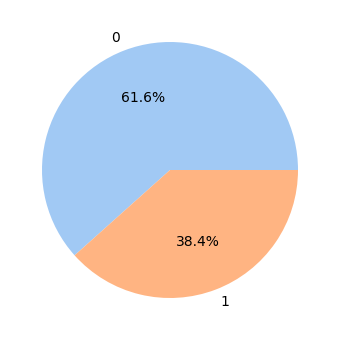

In [15]:
plt.pie(cleaned_data['Survived'].value_counts(),autopct='%.1f%%',
        labels=cleaned_data['Survived'].value_counts().index)
plt.show()

可以看到泰坦尼克号事件中有38.4%的乘客幸存。

#### 年龄分布及幸存关系图

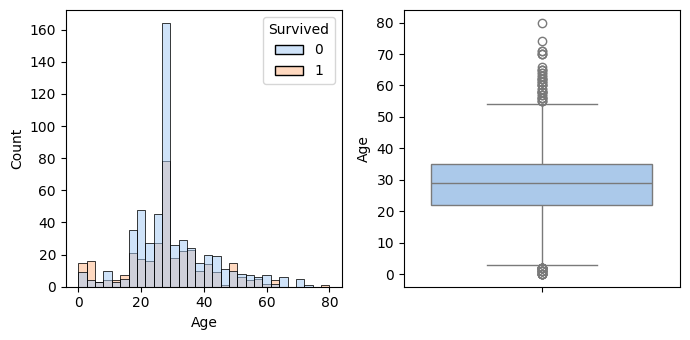

In [16]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x='Age',hue=cleaned_data['Survived'],ax=axes[0])
sns.boxplot(cleaned_data,y='Age',ax=axes[1])
plt.show()

可以看到，乘客年龄大多集中在20-40岁之间，但也存在一些极端值，表示高龄老人和低龄婴儿。其中婴幼儿存活概率相当高。

#### 票价金额及幸存关系

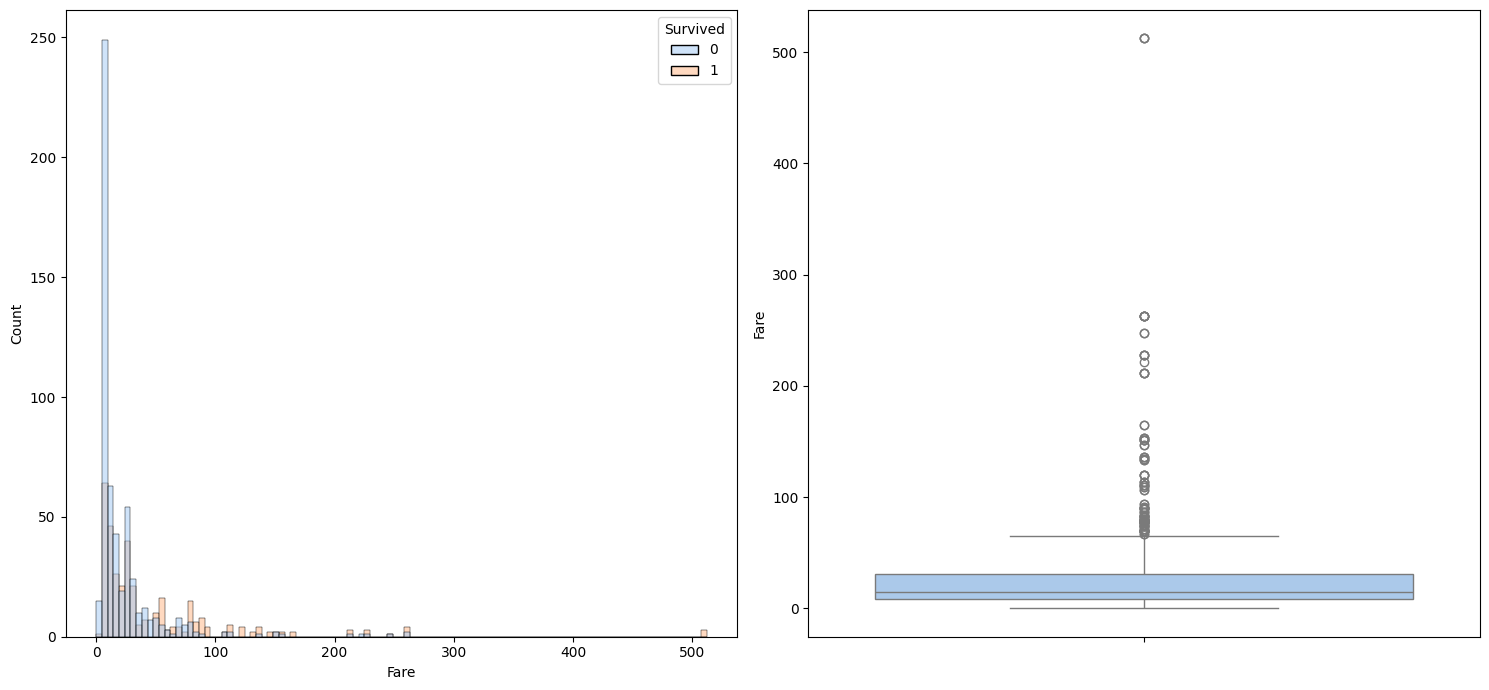

In [17]:
figure,axes = plt.subplots(1,2,figsize=[15,7])
sns.histplot(cleaned_data,x='Fare',hue=cleaned_data['Survived'],ax=axes[0])
sns.boxplot(cleaned_data,y='Fare',ax=axes[1])
plt.show()

可以看到票价在0-30的数量最多，但也存在许多极端值票价拉高了平均值。其中票价与存活概率呈现正相关关系。

#### 性别与幸存关系

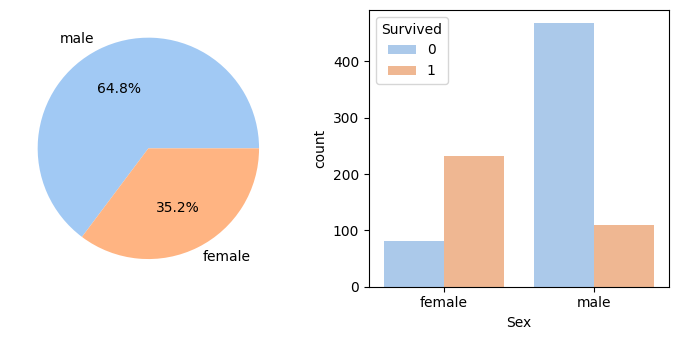

In [18]:
figure,axes = plt.subplots(1,2)
axes[0].pie(cleaned_data['Sex'].value_counts(),labels=cleaned_data['Sex'].value_counts().index,autopct='%.1f%%')
sns.countplot(cleaned_data,x='Sex',hue=cleaned_data['Survived'],ax=axes[1])
plt.show()

女性乘客的数量小于男性乘客，但男性乘客活概率在15%左右；女性乘客的存活概率在80%左右，远高于男性乘客。

#### 船舱等级与幸存关系

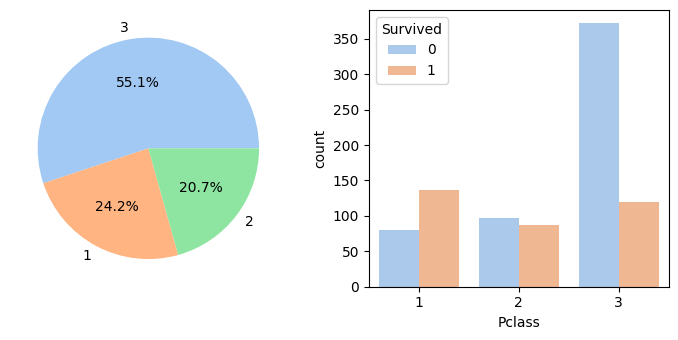

In [19]:
figure,axes = plt.subplots(1,2)
axes[0].pie(cleaned_data['Pclass'].value_counts(),labels=cleaned_data['Pclass'].value_counts().index,
            autopct='%.1f%%')
sns.countplot(cleaned_data,x='Pclass',hue=cleaned_data['Survived'],ax=axes[1])
plt.show()

可以看到，三等船舱人数最多，二等船舱人数最少。其中船舱等级与存活概率呈正相关关系。

#### 亲人数量与幸存关系

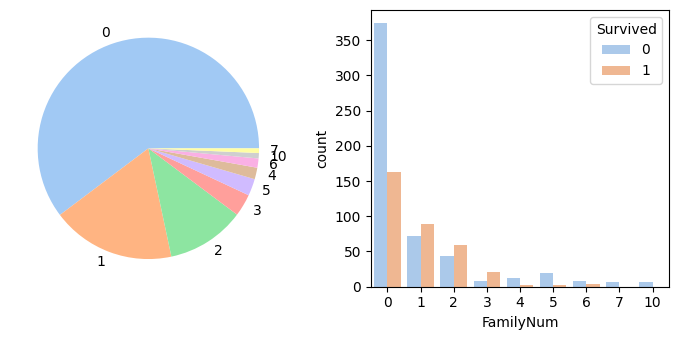

In [20]:
figure,axes = plt.subplots(1,2)
axes[0].pie(cleaned_data['FamilyNum'].value_counts(),labels=cleaned_data['FamilyNum'].value_counts().index)
sns.countplot(cleaned_data,x='FamilyNum',hue=cleaned_data['Survived'],ax=axes[1])
plt.show()

可以看到，有1-3亲人的乘客存活概率最高。

### 数据分析

In [21]:
analyse_data = cleaned_data.copy()

In [22]:
import statsmodels.api as sm

In [23]:
analyse_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,23.4500,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,0


In [24]:
analyse_data = analyse_data.drop(['PassengerId','Name','Ticket'],axis=1)

删除大概率不会影响存活率的变量

In [25]:
analyse_data = pd.get_dummies(analyse_data,columns=['Pclass','Sex'],dtype=int,drop_first=True)
analyse_data.head()

,Survived,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22,7.2500,1,0,1,1
1,1,38,71.2833,1,0,0,0
2,1,26,7.9250,0,0,1,0
3,1,35,53.1000,1,0,0,0
4,0,35,8.0500,0,0,1,1


引入虚拟变量

In [26]:
y=analyse_data['Survived']
x=analyse_data.drop('Survived',axis=1)

In [27]:
x.corr().abs()>0.8

,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False
Fare,False,True,False,False,False,False
FamilyNum,False,False,True,False,False,False
Pclass_2,False,False,False,True,False,False
Pclass_3,False,False,False,False,True,False
Sex_male,False,False,False,False,False,True


自变量之间不具备高度相关性，可以进行逻辑回归。

In [28]:
x = sm.add_constant(x)

In [29]:
model =sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443602
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.3338
Time:                        14:10:25   Log-Likelihood:                -395.25
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.874e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7985      0.443      8.571      0.000       2.930       4.667
Age           -0.0387      0.008     -4.954      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.316      0.188      -0.002       0.008
FamilyNum     -0.2421      0.068     -3.586      0.000      -0.374      -0.110
Pclass_2      -0.9966      0.293     -3.405      0.001      -1.570      -0.423
Pclass_3      -2.1338      0.289     -7.374      0.000      -2.701      -1.567
Sex_male      -2.7757      0.199    -13.983      0.000      -3.165      -2.387
==============================================================================
"""

当我们把显著性水平设置为5%时，模型认为Fare（票价）对幸存概率没有显著性影响，应当删除。

In [30]:
x = x.drop('Fare',axis=1)

In [31]:
model =sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444686
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.3322
Time:                        14:10:25   Log-Likelihood:                -396.22
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 5.211e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0512      0.403     10.058      0.000       3.262       4.841
Age           -0.0394      0.008     -5.055      0.000      -0.055      -0.024
FamilyNum     -0.2176      0.064     -3.373      0.001      -0.344      -0.091
Pclass_2      -1.1766      0.261     -4.509      0.000      -1.688      -0.665
Pclass_3      -2.3480      0.243     -9.677      0.000      -2.824      -1.872
Sex_male      -2.7851      0.198    -14.072      0.000      -3.173      -2.397
==============================================================================
"""

逻辑回归模型认为高龄、家庭人数多、不在一等舱、男性会显著降低幸存概率。

其中系数表示e的次方。

In [32]:
np.exp(-0.0394)

0.9613660857925073

年龄系数为-0.0394表示年龄每增加一岁，生存概率会降低4%。

In [33]:
np.exp(-0.2176)

0.8044471561818398

亲戚人数系数为（-0.2176）表示亲戚人数每增加1人，生存概率会降低20%左右。

In [34]:
np.exp(-1.1766)

0.3083252643980769

二等舱系数为（-1.1766）表示二等舱乘客生还概率比一等舱乘客低70%左右

In [35]:
np.exp(-2.3480)

0.09556009140552765

三等舱系数为（-1.1766）表示二等舱乘客生还概率比一等舱乘客低90%左右

In [36]:
np.exp(-2.7851)

0.06172291643069087

男性乘客系数为(-2.7851)表示男性乘客比女性乘客生还概率低94%左右。

### 用模型预测乘客生还概率

In [37]:
predict_data = pd.read_csv('titanic_test.csv')
predict_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


数据在 Age 上存在缺失，需要用平均值进行补全。Pclass、Sex的数据类型需要改为category;SibSp和Parch需要进行合并。

In [39]:
predict_data['Age'] = predict_data['Age'].fillna(predict_data['Age'].mean())

In [40]:
predict_data['Pclass'] = predict_data['Pclass'].astype('category')
predict_data['Sex'] = predict_data['Sex'].astype('category')
predict_data['Age'] = predict_data['Age'].astype(int)

In [41]:
predict_data['FamilyNum'] = predict_data['SibSp']+predict_data['Parch']

In [42]:
predict_data = predict_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
                                 ,axis=1)

In [43]:
predict_data['Pclass'] = pd.Categorical(predict_data['Pclass'],categories=['1','2','3'])
predict_data['Sex'] = pd.Categorical(predict_data['Sex'],categories=['female','male'])

变量分类，为引入虚拟变量做准备。

In [44]:
predict_data = pd.get_dummies(predict_data,columns=['Pclass','Sex'],drop_first=True,dtype=int)
predict_data.head()

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,34,0,0,0,1
1,47,1,0,0,0
2,62,0,0,0,1
3,27,0,0,0,1
4,22,2,0,0,0


In [45]:
x_predict =predict_data[['Age','FamilyNum','Pclass_2','Pclass_3','Sex_male']]

In [46]:
x_predict = sm.add_constant(x_predict)

In [47]:
predict_value = model.predict(x_predict)
predict_value

0      0.481921
1      0.879050
2      0.236023
3      0.550630
4      0.939917
         ...   
413    0.521267
414    0.925252
415    0.442798
416    0.521267
417    0.413386
Length: 418, dtype: float64

In [48]:
(predict_value>0.5).sum()

318

预测数据中418人有318人拥有50%以上的存活率。